In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

    Games  Minutes    FG%    3P%    2P%   eFG%    FT%  TRB   AST  BLK  TOV  \
0      77     37.7  0.567  0.379  0.622  0.610  0.750  6.9   6.3  0.3  3.5   
1      69     36.1  0.488  0.354  0.536  0.535  0.710  6.0   7.4  0.7  3.9   
2      76     35.6  0.520  0.309  0.573  0.551  0.731  7.4   6.8  0.6  3.3   
3      74     37.8  0.548  0.363  0.611  0.594  0.674  8.6   8.7  0.6  4.1   
4      82     36.9  0.542  0.367  0.603  0.590  0.731  8.6   9.1  0.9  4.2   
5      55     35.2  0.510  0.339  0.582  0.560  0.665  8.5   8.3  0.6  3.6   
6      67     34.6  0.493  0.348  0.564  0.550  0.693  7.8  10.2  0.5  3.9   
7      45     33.4  0.513  0.365  0.591  0.576  0.698  7.7   7.8  0.6  3.7   
8      56     37.2  0.524  0.359  0.620  0.590  0.756  8.2   6.2  1.1  3.5   
9      55     35.5  0.500  0.321  0.580  0.549  0.768  8.3   6.8  0.6  3.2   
10     71     35.3  0.540  0.410  0.592  0.599  0.750  7.3   8.3  0.5  3.5   

     PTS  
0   27.1  
1   25.3  
2   25.3  
3   26.4  
4   27.5

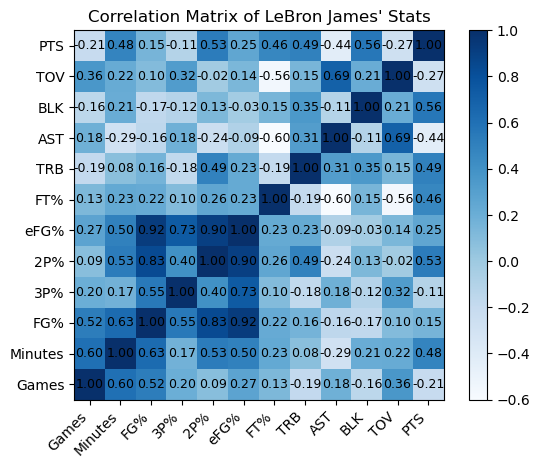

In [84]:
# Initialize an empty list to store LeBron's points data
lebron_data = []

# Loop through each year from 2014 to 2024 and collect the points data
for year in range(2014, 2025):
    filename = f'csv/{year}_NBA.csv'
    playerData = pd.read_csv(filename)

    # Filter for LeBron James
    lebron_playerData = playerData[playerData['Player'] == 'LeBron James']

    # Extract the points and minutes per game data
    games = lebron_playerData['G'].values[0]
    minutes = lebron_playerData['MP'].values[0]
    
    field_goal_percentage = lebron_playerData['FG%'].values[0]
    three_point_percentage = lebron_playerData['3P%'].values[0]
    two_point_percentage = lebron_playerData['2P%'].values[0]
    efficiency_percentage = lebron_playerData['eFG%'].values[0]
    free_throw_percentage = lebron_playerData['FT%'].values[0]
    tot_reb = lebron_playerData['TRB'].values[0]
    assist = lebron_playerData['AST'].values[0]
    blocks = lebron_playerData['BLK'].values[0]
    turnovers = lebron_playerData['TOV'].values[0]
    points = lebron_playerData['PTS'].values[0]
    lebron_data.append({
        'Games' : games,
        'Minutes' : minutes,
        'FG%' : field_goal_percentage,
        '3P%' : three_point_percentage,
        '2P%' : two_point_percentage,
        'eFG%' : efficiency_percentage,
        'FT%' : free_throw_percentage,
        'TRB' : tot_reb,
        'AST' : assist,
        'BLK' : blocks,
        'TOV' : turnovers,
        'PTS' : points
        
    })
lebron_df = pd.DataFrame(lebron_data, columns=['Games', 'Minutes', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TRB', 'AST', 'BLK', 'TOV', 'PTS'])
print(lebron_df)
print(lebron_df.describe(include='all'))

# Create correlation matrix
matrix = lebron_df.corr()

# Plot correlation matrix
plt.imshow(matrix, cmap='Blues')
plt.colorbar()

variables = []
for i in matrix.columns:
    variables.append(i)

plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)
plt.gca().invert_yaxis() 

for i in range(len(matrix.columns)):
    for j in range(len(matrix.columns)):
        plt.text(j, i, f'{matrix.iloc[i, j]:.2f}', ha='center', va='center', fontsize=9)
plt.title('Correlation Matrix of LeBron James\' Stats')
plt.show()

